In [1]:
import os
import torch
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

# hyper parameters
LR = 0.01
EPOCH = 2
BATCH_SIZE = 64
DOWNLOAD_MNIST = False

# not mnist dir or mnist is empyt dir
if not(os.path.exists('./mnist/')) or not os.listdir('./mnist/'):
    print("download dataset...")
    DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(
    root = './mnist/',
    train = True,                                     # this is training data
    transform = torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download = DOWNLOAD_MNIST,
)

test_data = torchvision.datasets.MNIST(
    root = './mnist/',
    train = False,   
)

# plot one example
print(train_data.train_data.size())                 # (60000, 28, 28)
print(train_data.train_labels.size())               # (60000)
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

D:\IDE\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])


D:\IDE\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000])


<Figure size 640x480 with 1 Axes>

In [2]:
# shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

D:\IDE\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\IDE\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [7]:
# build batch dataset and network
train_loader = Data.DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)

class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = torch.nn.Sequential(         # input shape (1, 28, 28)
            torch.nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after Conv2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            torch.nn.ReLU(),                      # activation
            torch.nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = torch.nn.Sequential(         # input shape (16, 14, 14)
            torch.nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            torch.nn.ReLU(),                      # activation
            torch.nn.MaxPool2d(2),                # output shape (32, 7, 7)
            torch.nn.Flatten()
        )
        
        self.dense = torch.nn.Linear(32*7*7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.dense(x)
        return output, x

In [4]:
cnn = CNN()
print(cnn)

optimizer = torch.optim.Adam(cnn.parameters(),lr=LR)
loss_func = torch.nn.CrossEntropyLoss()

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Flatten()
  )
  (dense): Linear(in_features=1568, out_features=10, bias=True)
)


Epoch:  0 | train loss: 0.0602 | test accuracy: 0.98


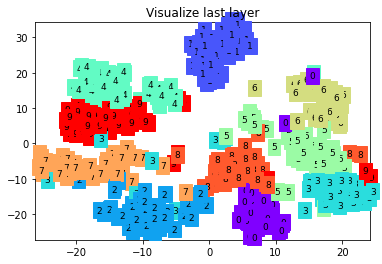

Epoch:  0 | train loss: 0.0159 | test accuracy: 0.98


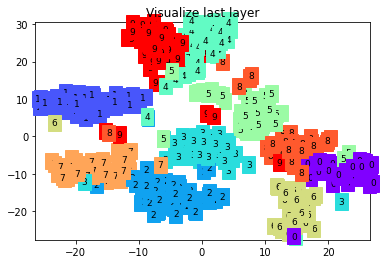

Epoch:  0 | train loss: 0.0511 | test accuracy: 0.97


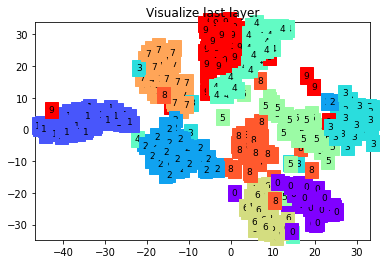

Epoch:  0 | train loss: 0.0377 | test accuracy: 0.98


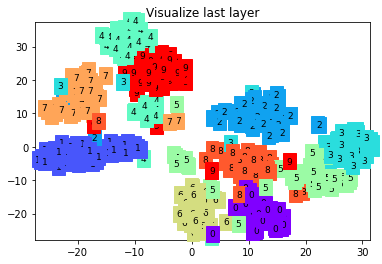

Epoch:  0 | train loss: 0.0069 | test accuracy: 0.97


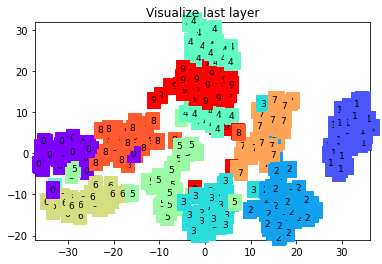

Epoch:  0 | train loss: 0.0672 | test accuracy: 0.97


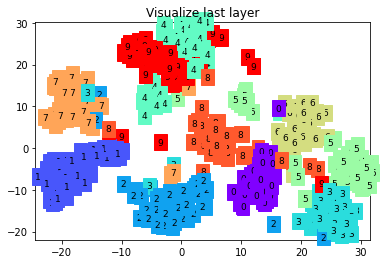

Epoch:  0 | train loss: 0.0261 | test accuracy: 0.97


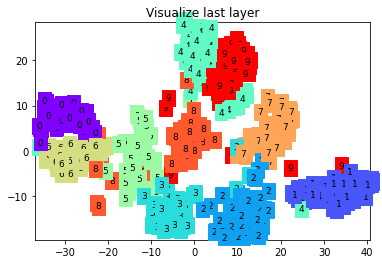

Epoch:  0 | train loss: 0.0217 | test accuracy: 0.97


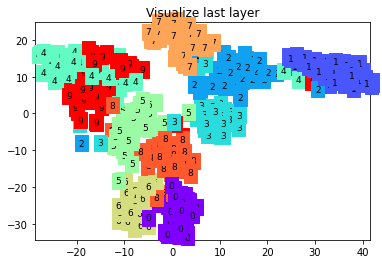

Epoch:  0 | train loss: 0.0258 | test accuracy: 0.97


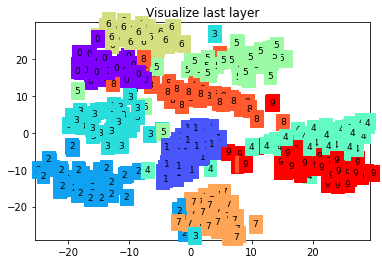

Epoch:  0 | train loss: 0.1492 | test accuracy: 0.98


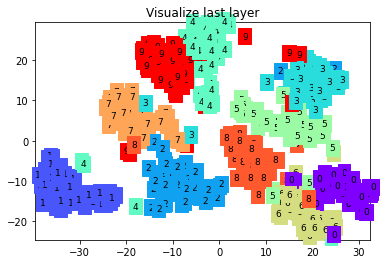

Epoch:  0 | train loss: 0.2082 | test accuracy: 0.97


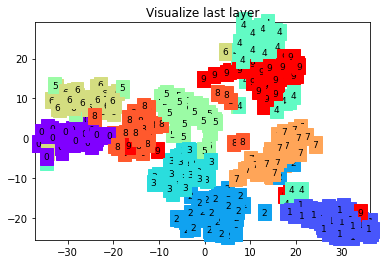

Epoch:  0 | train loss: 0.2482 | test accuracy: 0.97


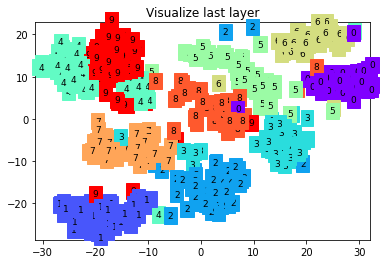

Epoch:  0 | train loss: 0.0730 | test accuracy: 0.98


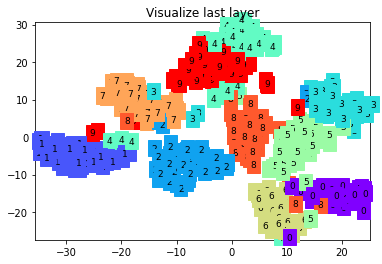

Epoch:  0 | train loss: 0.0315 | test accuracy: 0.98


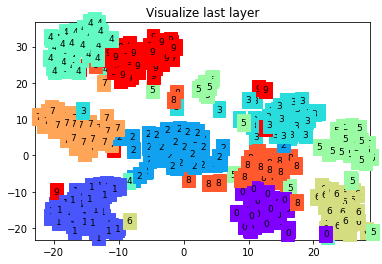

Epoch:  0 | train loss: 0.0462 | test accuracy: 0.98


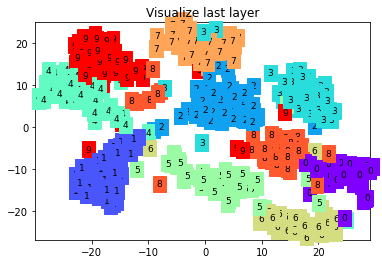

Epoch:  0 | train loss: 0.0111 | test accuracy: 0.97


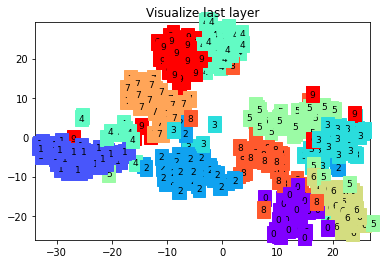

Epoch:  0 | train loss: 0.1176 | test accuracy: 0.98


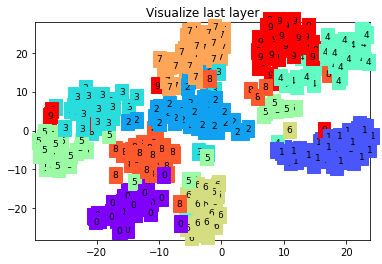

Epoch:  0 | train loss: 0.0321 | test accuracy: 0.98


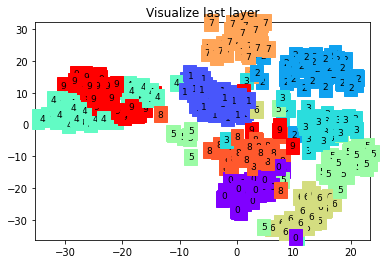

Epoch:  0 | train loss: 0.0788 | test accuracy: 0.97


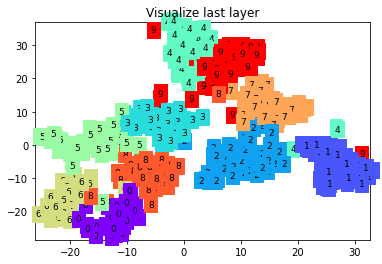

Epoch:  1 | train loss: 0.0316 | test accuracy: 0.97


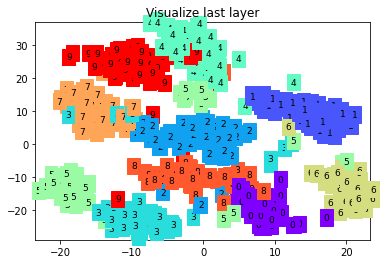

Epoch:  1 | train loss: 0.0070 | test accuracy: 0.98


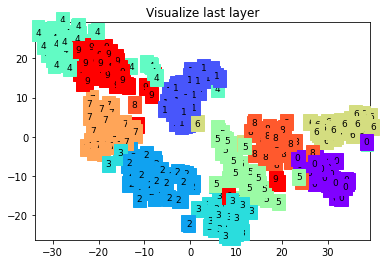

Epoch:  1 | train loss: 0.0074 | test accuracy: 0.97


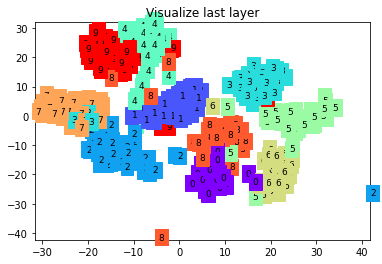

Epoch:  1 | train loss: 0.2477 | test accuracy: 0.98


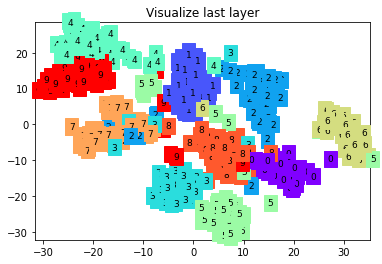

Epoch:  1 | train loss: 0.0720 | test accuracy: 0.97


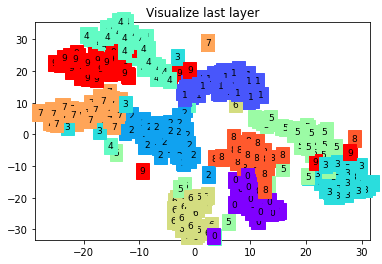

Epoch:  1 | train loss: 0.0105 | test accuracy: 0.97


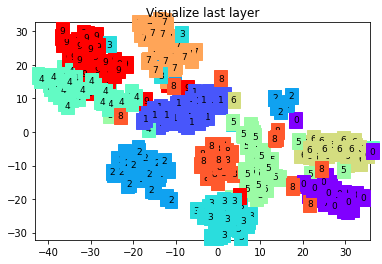

Epoch:  1 | train loss: 0.0794 | test accuracy: 0.98


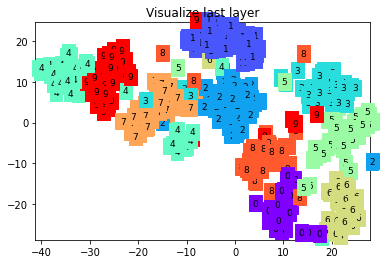

Epoch:  1 | train loss: 0.0291 | test accuracy: 0.97


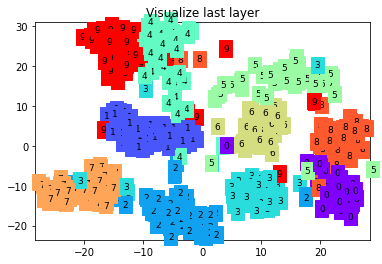

Epoch:  1 | train loss: 0.0315 | test accuracy: 0.97


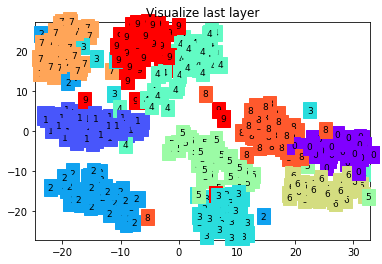

Epoch:  1 | train loss: 0.0890 | test accuracy: 0.97


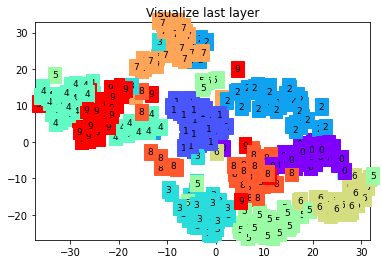

Epoch:  1 | train loss: 0.2028 | test accuracy: 0.97


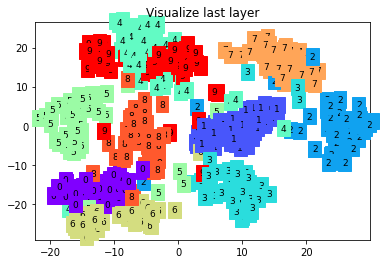

Epoch:  1 | train loss: 0.0263 | test accuracy: 0.98


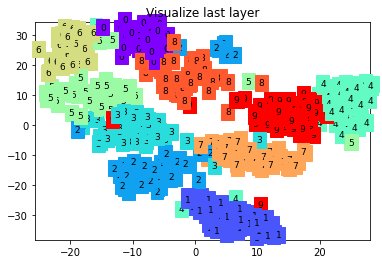

Epoch:  1 | train loss: 0.1162 | test accuracy: 0.97


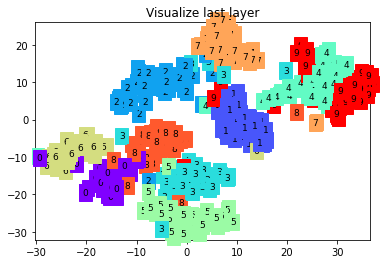

Epoch:  1 | train loss: 0.1987 | test accuracy: 0.98


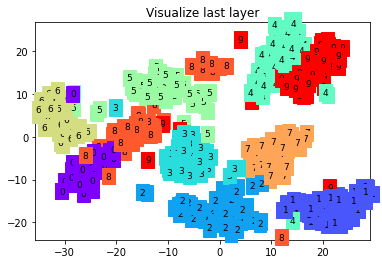

Epoch:  1 | train loss: 0.0039 | test accuracy: 0.97


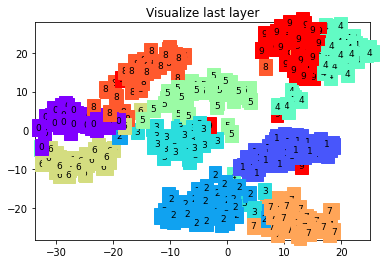

Epoch:  1 | train loss: 0.0798 | test accuracy: 0.98


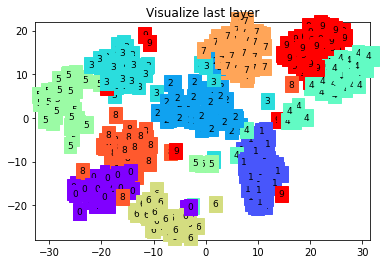

Epoch:  1 | train loss: 0.0889 | test accuracy: 0.97


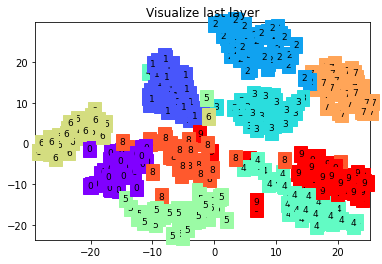

Epoch:  1 | train loss: 0.1711 | test accuracy: 0.98


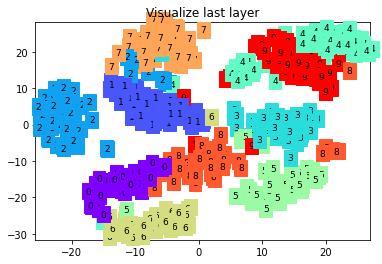

Epoch:  1 | train loss: 0.0541 | test accuracy: 0.98


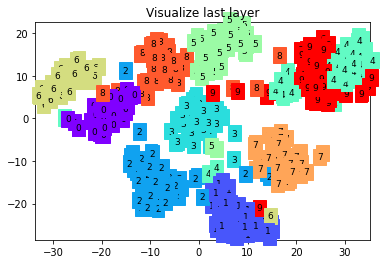

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


In [10]:
# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('Please install sklearn for layer visualization')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)

plt.ion()
# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
                plot_only = 500
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()

# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')